# P3. Exploration SQL

Le répertoire `/db` contient une base de données SQLite3 `olympics.sqbpro` reprenant les résultats des épreuves des jeux d'été pour une période donnée (cf P1 & P2).

On s'intéresse dans le cadre de cette partie P3 à l'exploration via SQL des résultats des JO d'été (table : `summer`).

---

### Question 1: Qu'est ce que SQL ?

**SQL (sigle de Structured Query Language, en français langage de requête structurée) est un langage informatique normalisé servant à exploiter des bases de données relationnelles. La partie langage de manipulation des données de SQL permet de rechercher, d'ajouter, de modifier ou de supprimer des données dans les bases de données relationnelles.**

(**Source:** https://fr.wikipedia.org/wiki/Structured_Query_Language)

### Question 2: Qu'est ce que SQLite 3 ? Avantages et/ou Inconvénients ?

**SQLite est simplement la version 3 de SQlite
L'avantage de la version 3 par rapport à la version 2 est qu'elle ajoute, entre autres, la régionalisation (avec le support des collations et de l'Unicode) et la déclaration des types.**

**SQLite est un projet à source ouverte disponible dans le domaine public.
MySQL est un projet open source qui appartient à Oracle.**

**SQLite est une base de données sans serveur et est autonome. Elle est également appelée base de données intégrée, ce qui signifie que le moteur de la base de données fonctionne comme une partie de l'application.**

**D'autre part, MySQL nécessite un serveur pour fonctionner. MySQL nécessitera une architecture client et serveur pour interagir sur un réseau.**

(**Source**: https://fr.wikipedia.org/wiki/SQLite, https://www.hostinger.com/tutorials/sqlite-vs-mysql-whats-the-difference/#:~:text=SQLite%20is%20a%20server%2Dless,to%20interact%20over%20a%20network).

### Question 3: Donner des exemples d'autres formats de fichier pouvant être utilisé pour fournir des données similaires 

**L'excel (.xlsm) ou encore l'OpenDocument (.odt)**

### Question 4: Quel est le type (texte ou binaire) du fichier base de données SQLite3?

Le fichier `olympics.sqbpro` est un fichier **binaire**

### Question 5: Donner les caractéristiques de la table `summer` ? 

**9 colonnes (comprenant Year, City, Sport, Discipline, Athlete, Country, Gender, Event et Medal), 31165 lignes**

---
### Question 6: Combien d'enregistrements possède la table `summer` ?

In [ ]:
Réponse 6:

SELECT count(*)
FROM summer

Résultat: **31165**

### Question 7: Quelle période des JO couvre ce fichier de résultats ?

In [ ]:
SELECT min(Year), max(Year)
FROM summer

Résultat: **1896-2012**

### Question 8: Indiquer les années et villes des olympiades ? 

In [ ]:
SELECT DISTINCT Year
FROM summer

In [ ]:
Résulats:
1896	Athens
1900	Paris
1904	St Louis
1908	London
1912	Stockholm
1920	Antwerp
1924	Paris
1928	Amsterdam
1932	Los Angeles
1936	Berlin
1948	London
1952	Helsinki
1956	Melbourne / Stockholm
1960	Rome
1964	Tokyo
1968	Mexico
1972	Munich
1976	Montreal
1980	Moscow
1984	Los Angeles
1988	Seoul
1992	Barcelona
1996	Atlanta
2000	Sydney
2004	Athens
2008	Beijing
2012	London

### Q1. Combien la France a remporté de médailles d’or aux JO de 1984 ? - (Christophe)

In [ ]:
SELECT count(*)
FROM (
SELECT DISTINCT  Sport, Discipline, Event, Gender
FROM summer
WHERE Year = 1984 AND Country = "FRA"  AND Medal = "Gold"
GROUP BY Sport, Discipline, Event, Gender
)

**5**

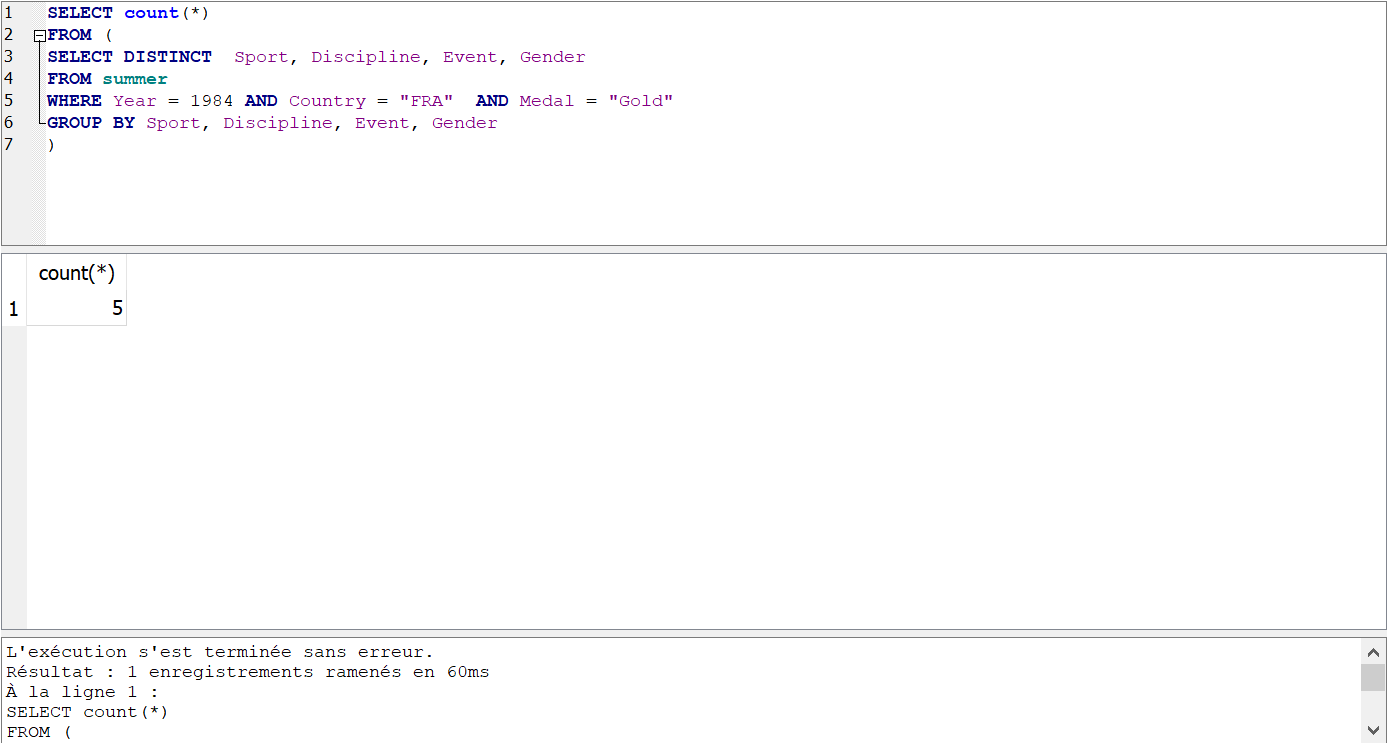

### Q2. Quel pays a le plus d’athlètes (toutes années confondues) ? (Matthias)

In [ ]:
SELECT Country AS Country, Count(DISTINCT Athlete) AS Athletes
FROM summer
GROUP BY Country
ORDER BY count(Athlete) DESC
LIMIT 1

**USA	3149**

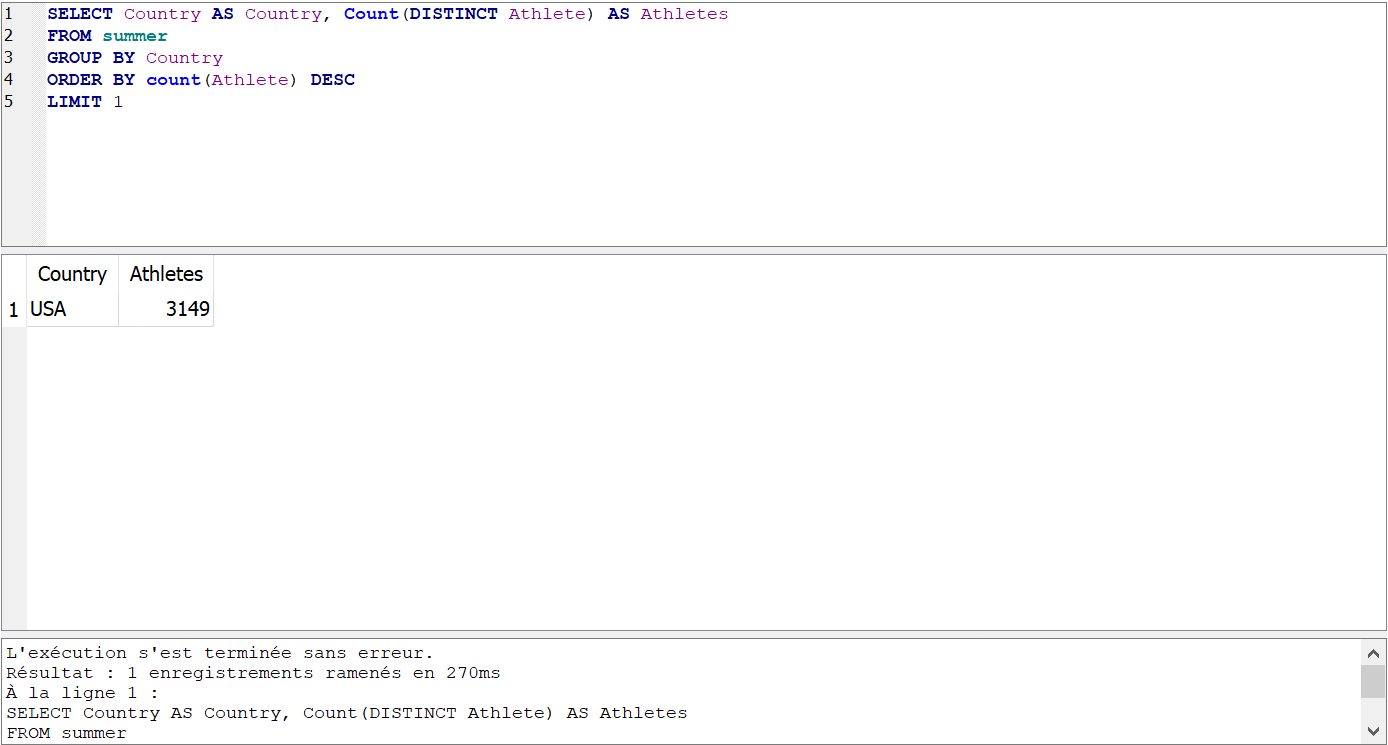

### Q3. En 2012 combien de médailles le Japon a t-il gagné ? (Théo)

In [ ]:
SELECT count(Medal)
FROM summer
WHERE Country = "JPN" AND Year = 2012

**84**

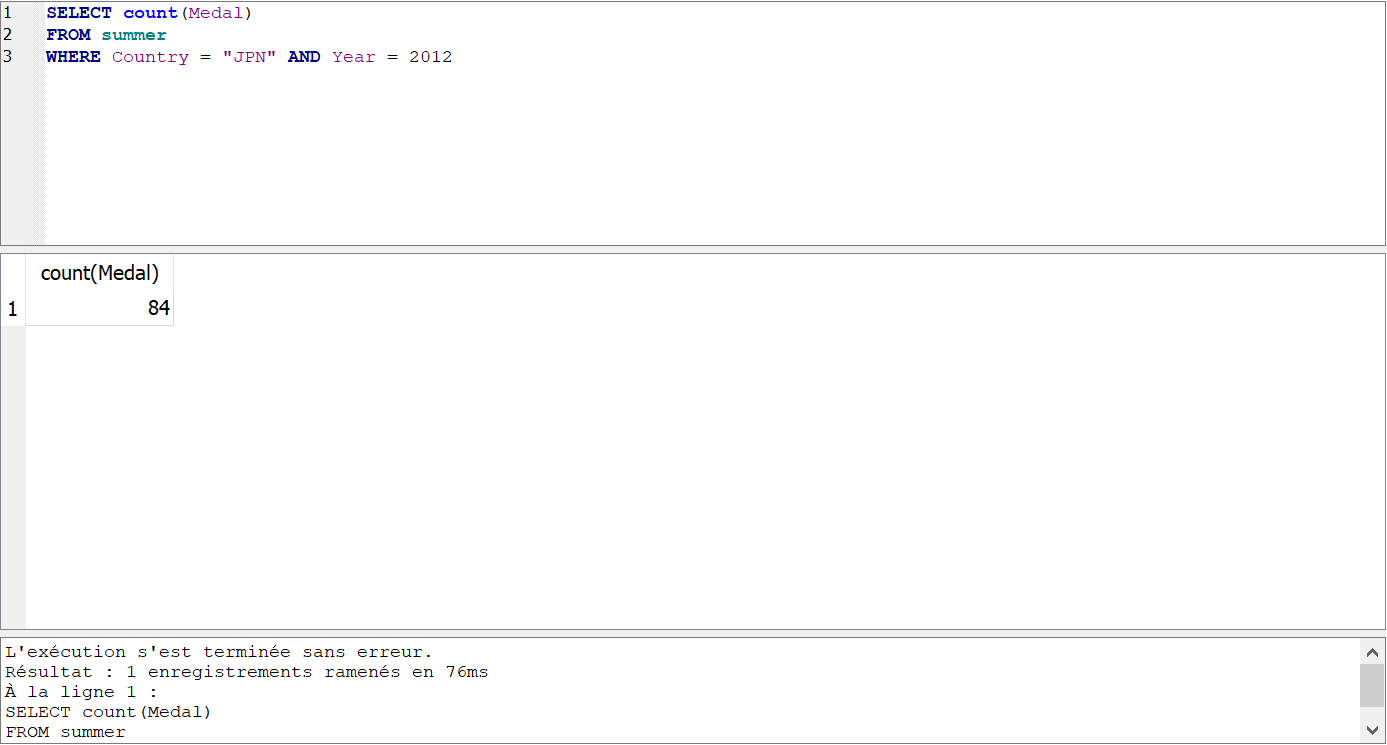

### Q4. Dans quels différents sports les Grecs ont-ils gagné des médailles ? - (Corentin L)

In [ ]:
SELECT Sport
FROM summer
WHERE Country = "GRE"
GROUP BY Sport

In [ ]:
Aquatics
Athletics
Cycling
Fencing
Gymnastics
Judo
Rowing
Sailing
Shooting
Taekwondo
Tennis
Weightlifting
Wrestling
Donc 13 différents sports.

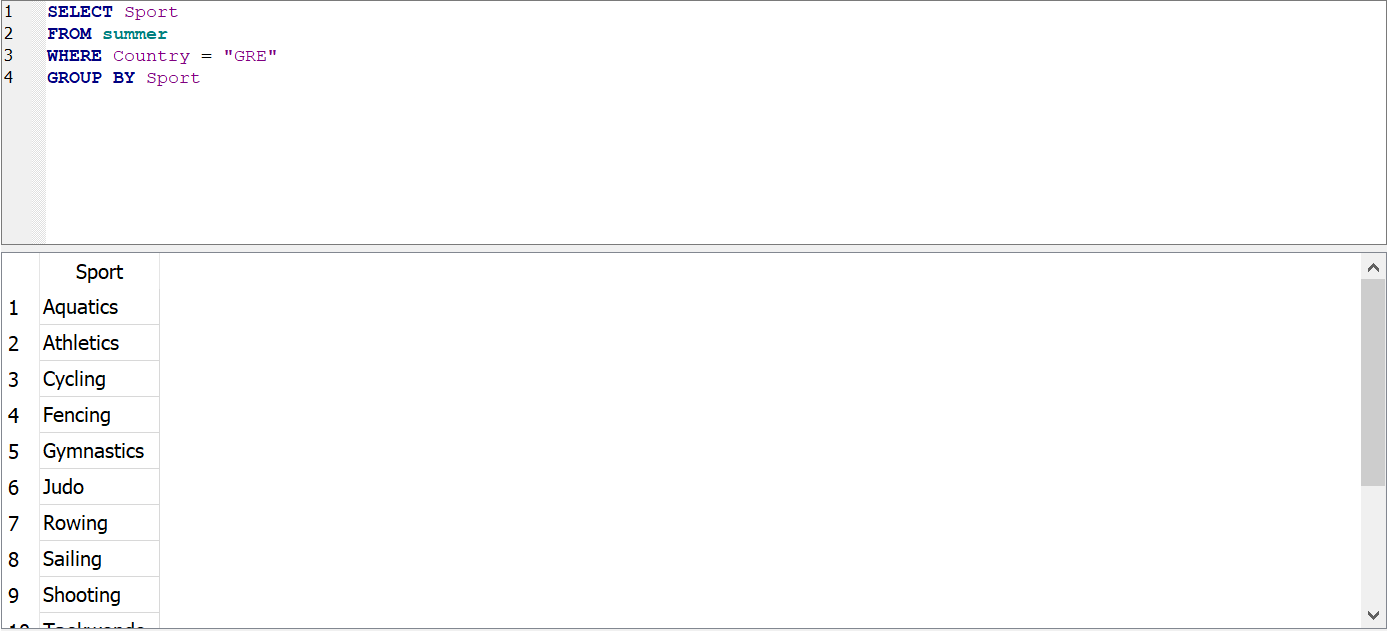

### Q5. Quel pays a remporté le plus de médailles d’or ? (Philippe)

In [ ]:
SELECT Country AS Country, count(Medal) 
FROM summer
WHERE Medal = "Gold"
GROUP BY Country
ORDER BY count(Country) DESC
LIMIT 5

In [ ]:
USA	2235
URS	838
GBR	546
ITA	476
GER	452
Le pays ayant remporté le plus de médailles d'or sont les USA.

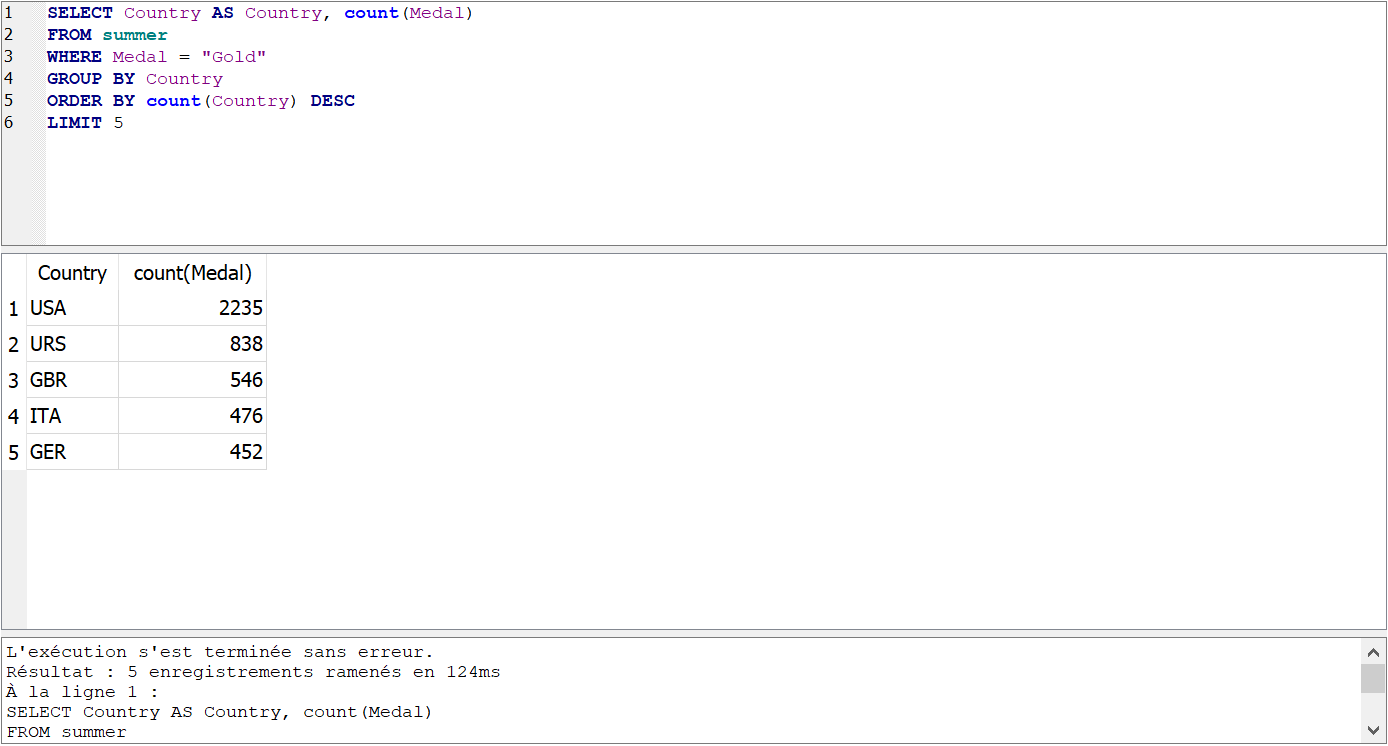

### Q6. Combien de villes différentes ont accueilli les JO d’été entre 1896 - et 2012 ? (Yoann)

In [ ]:
SELECT count(DISTINCT City) AS City
FROM summer

**22**

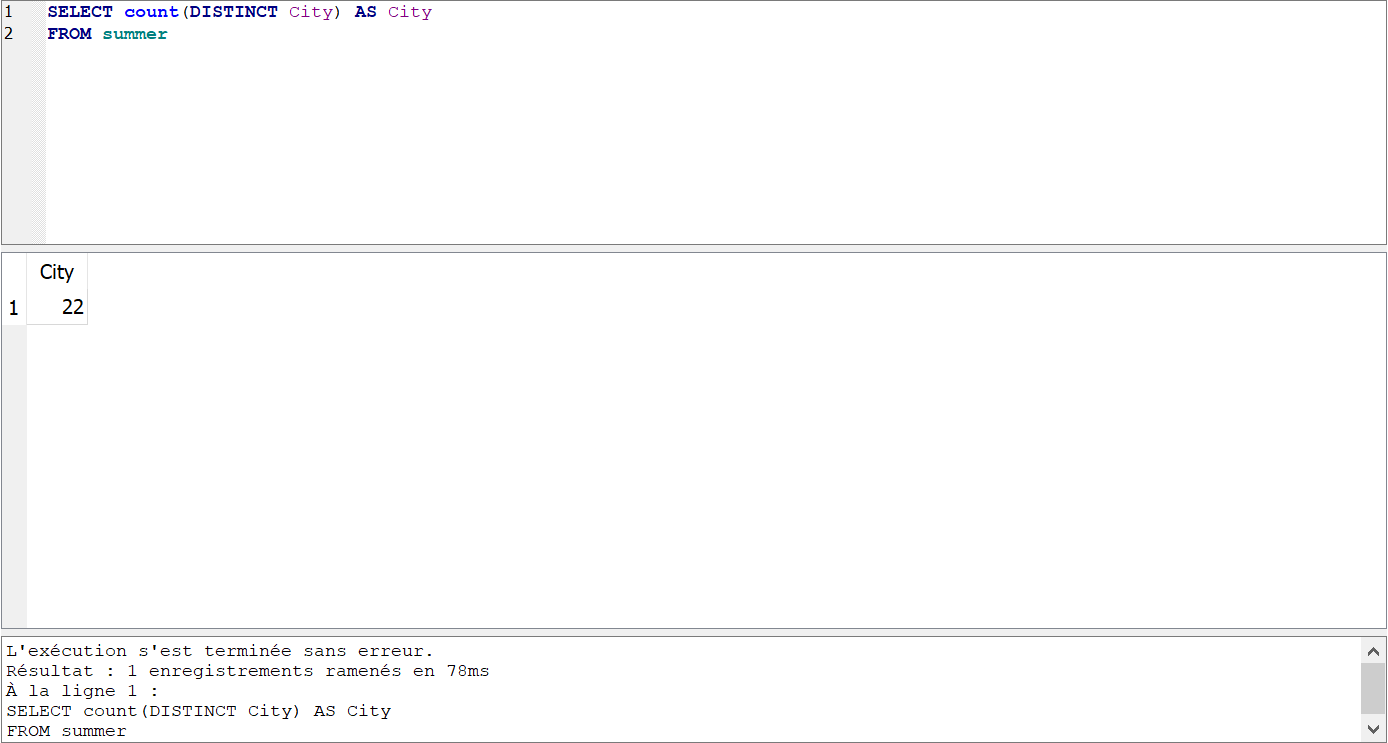

### Q7. Combien de femmes ont obtenu une médaille d’or ? (Lamia)

In [ ]:
SELECT count(Gender)
FROM summer
WHERE Medal = "Gold" AND Gender = "Women"

**2788**

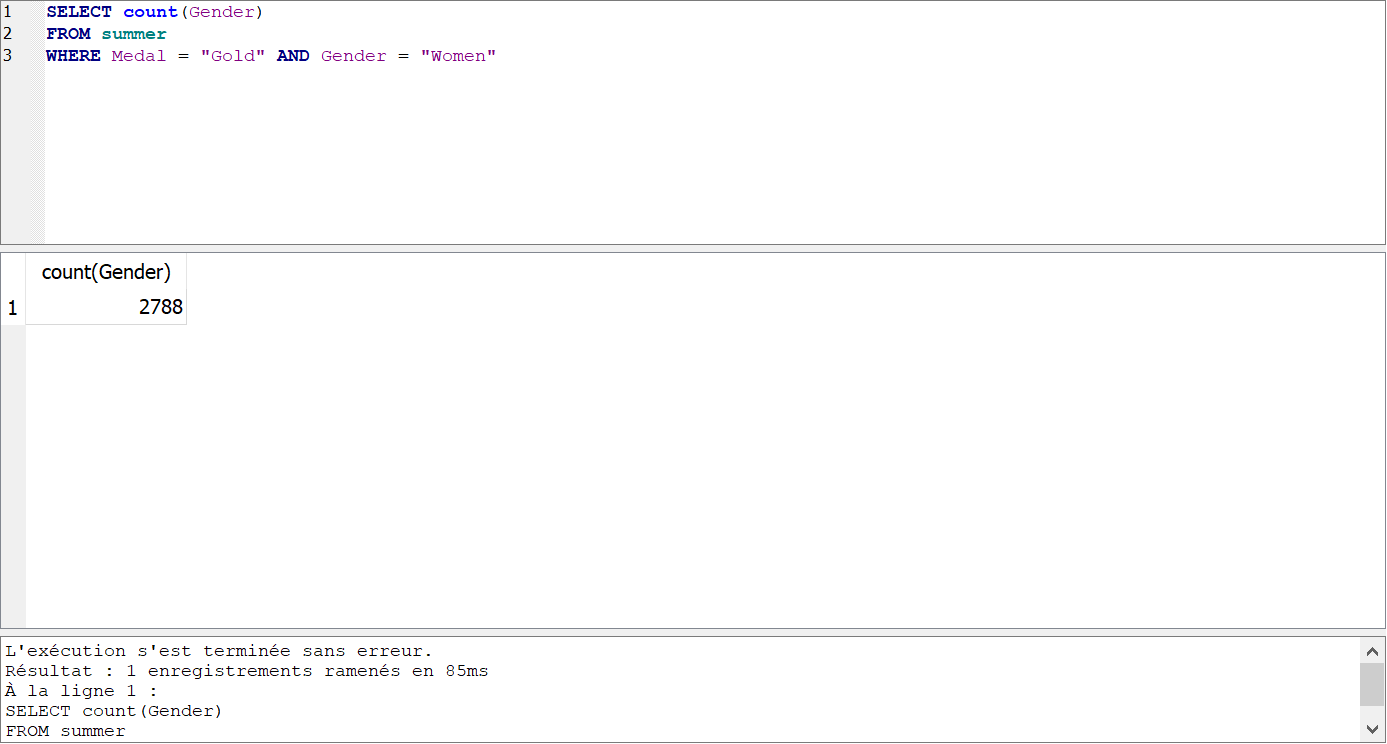

### Q8. Combien de sports différents sont représentés par année ? (joris)

In [ ]:
SELECT Year as Year, count(DISTINCT Sport)
FROM summer
GROUP BY Year

In [ ]:
1896	9
1900	19
1904	16
1908	22
1912	14
1920	22
1924	17
1928	14
1932	14
1936	19
1948	17
1952	17
1956	17
1960	17
1964	19
1968	18
1972	21
1976	21
1980	21
1984	21
1988	23
1992	25
1996	26
2000	28
2004	28
2008	28
2012	26

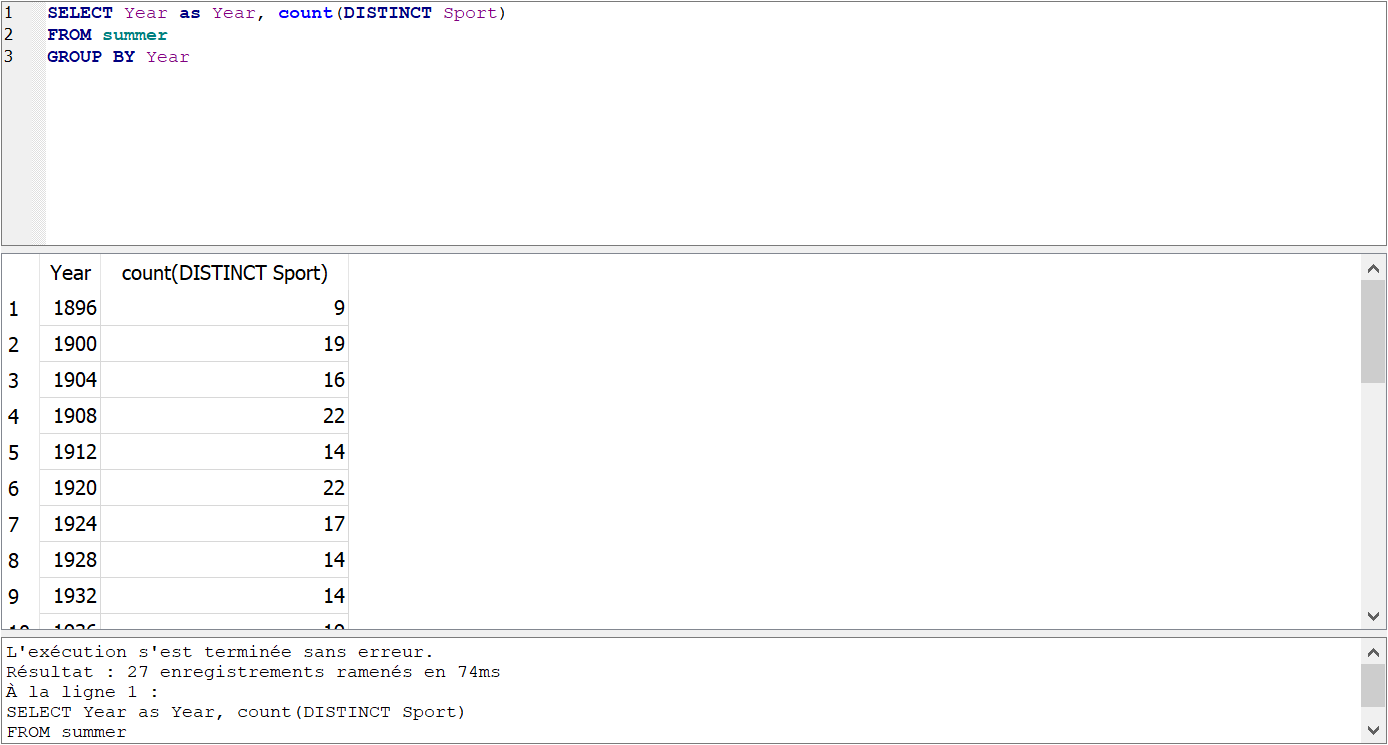

### Q9. Combien de fois Londres a accueilli les J.O ? (Marvin)

In [ ]:
SELECT City as City, count(DISTINCT Year)
FROM summer
WHERE City = "London"

In [ ]:
London	3

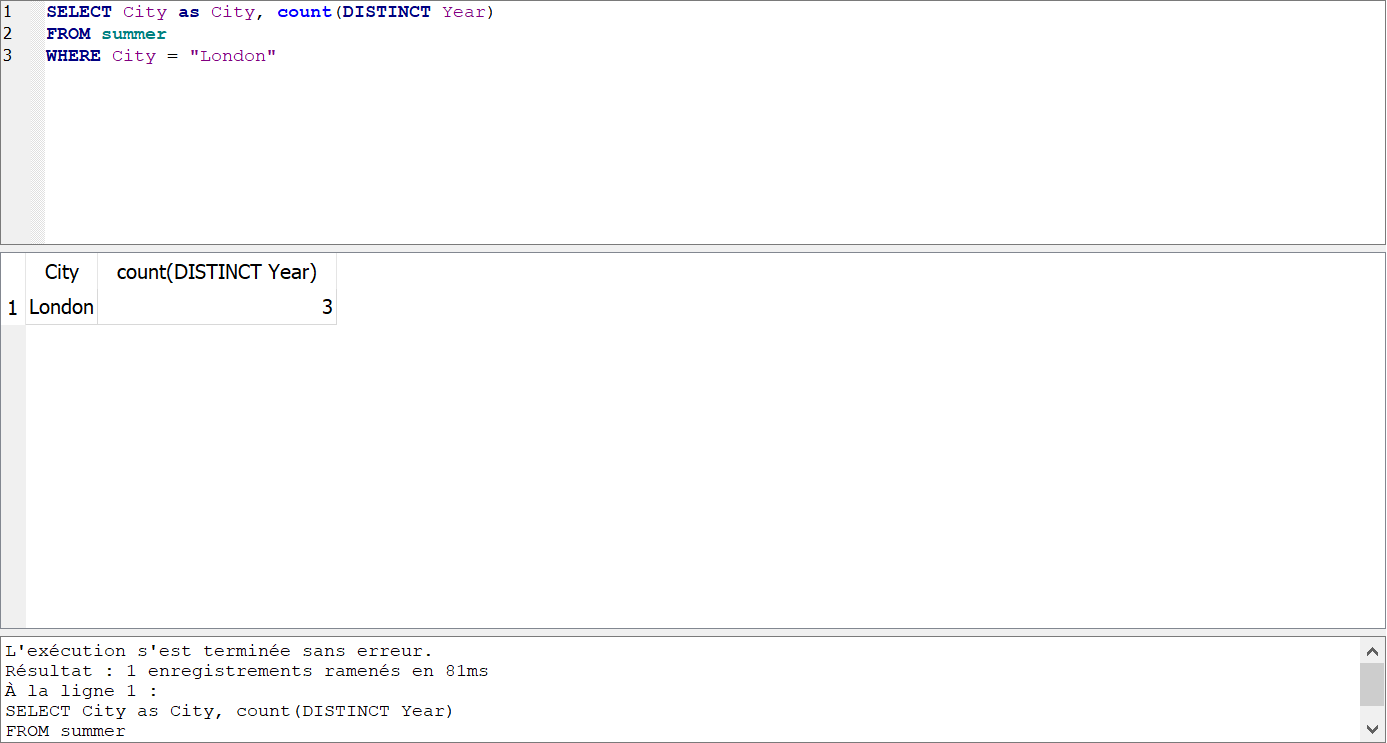

### Q10. Combien de joueuses comptait la sélection brésilienne de volley-ball - médaillée d’or aux J.O de 2012 ? (Corentin P)

In [ ]:
SELECT Country AS Country, Gender AS Gender, count(Gender)
FROM summer
WHERE Year = 2012 AND Gender = "Women" AND Country = "BRA" AND Medal = "Gold" AND Sport = "Volleyball"

In [ ]:
BRA	Women	12

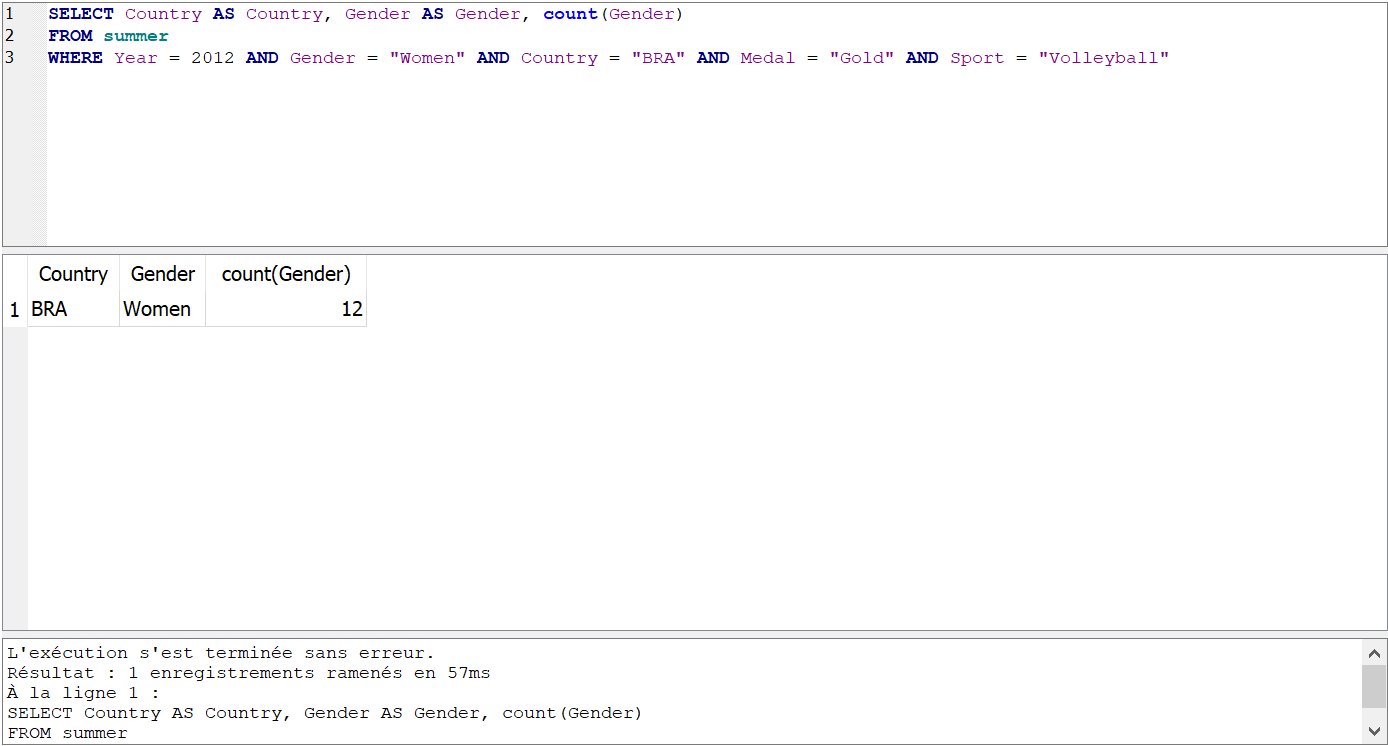

### Q11. Combien de femmes françaises ont participé en 2012 , quel sont leurs médailles ? (izak)

In [ ]:
SELECT Gender as Gender, count(DISTINCT Athlete)
FROM summer
WHERE Gender = "Women" AND Year = 2012 AND Country = "FRA"

In [ ]:
Women	29
29 femmes françaises ont participé en 2012

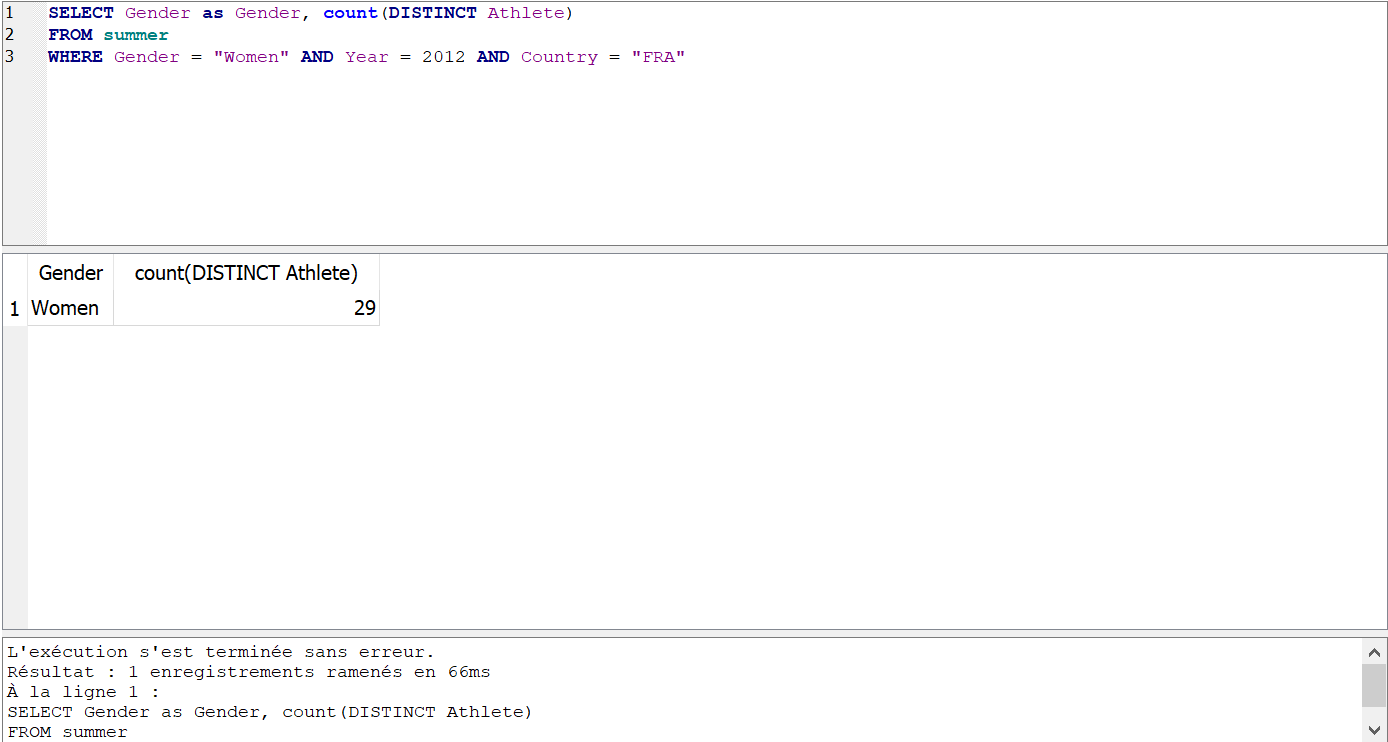

In [ ]:
SELECT Medal as Medal, count(DISTINCT Athlete)
FROM summer
WHERE Gender = "Women" AND Year = 2012 AND Country = "FRA"
GROUP BY Medal

In [ ]:
Bronze	12
Gold	4
Silver	15
Leurs médailles sont 12 médailles de Bronze, 15 d'argent, 4 d'Or.

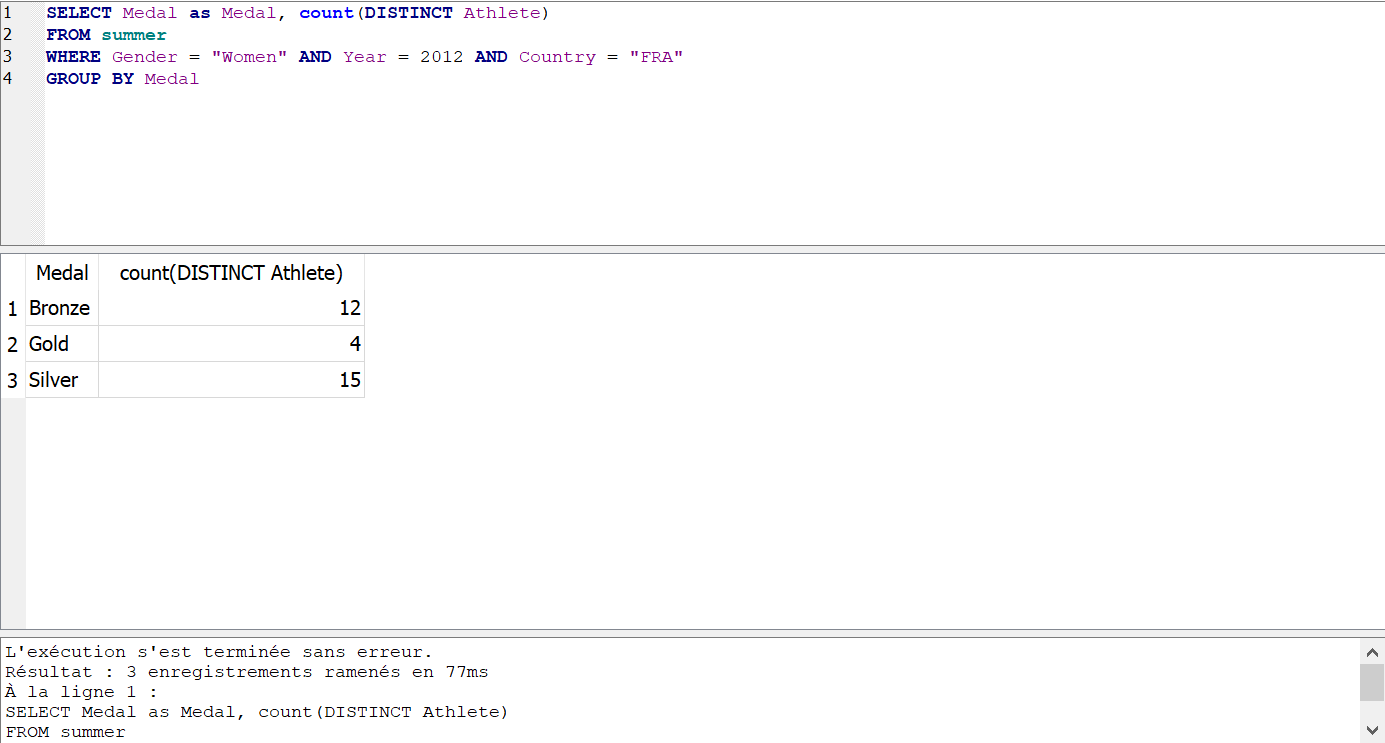

### Q12. Quel est l’athlète qui a remporté le plus de médailles d’or ? - (mayel)

In [ ]:
SELECT Athlete as Athlete, count(Medal)
FROM summer
WHERE Medal = "Gold"
GROUP BY Athlete
ORDER BY count(Medal)DESC
LIMIT 5

In [ ]:
PHELPS, Michael	18
SPITZ, Mark	9
NURMI, Paavo	9
LEWIS, Carl	9
LATYNINA, Larisa	9
L'athlète qui a remporté le plus de médailles d'or est Michael PHELPS avec ses 18 médailles d'or.

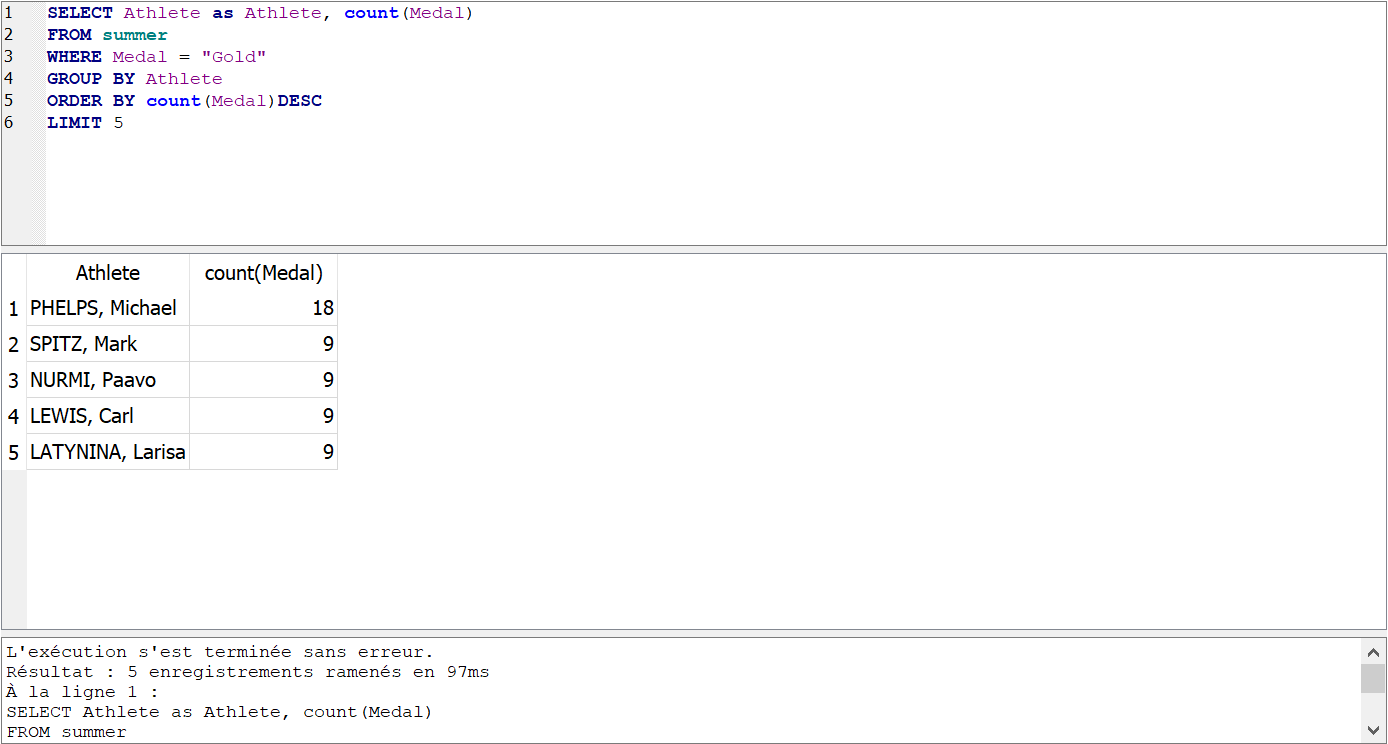

### Q13. Est-ce que la France à déjà gagné une médaille d’or au cricket ? - (jordan)

In [ ]:
SELECT count(medal)
FROM summer
WHERE Sport = "Cricket" AND Country = "FRA" AND Medal = "Gold"

In [ ]:
0

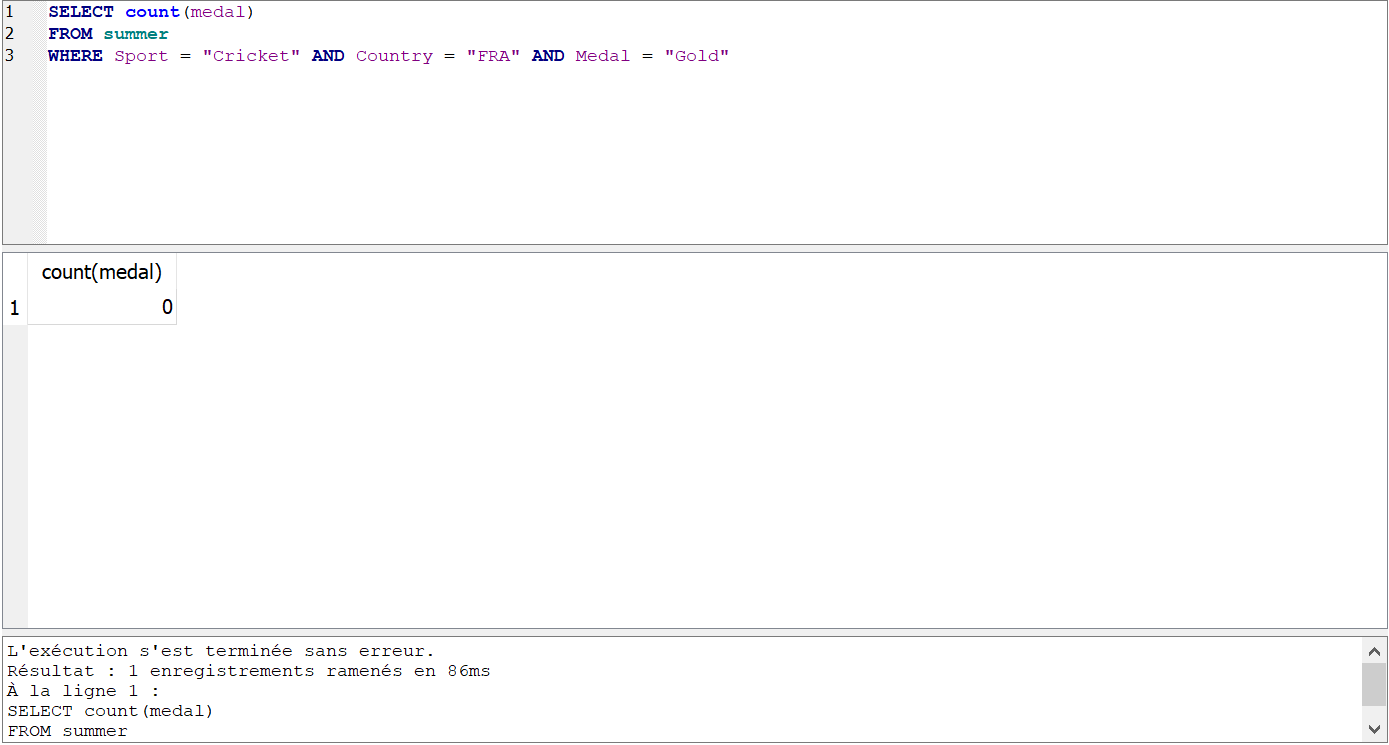

### Q14. Combien de médaillés ont un nom de famille de plus de 6 lettres en - excluant les années paires ? (jonathan)

**Il n'y a aucun JO les années impaires, donc 0** (Merci Jonathan)

### Q15. Le nombre de médailles d’or par pays en 2012 (Maëlle)

In [ ]:
SELECT Country as Country, count(Medal)
FROM summer
WHERE Medal = "Gold" AND Year = 2012
GROUP BY Country
ORDER BY count(Medal) DESC

In [ ]:
USA	147
CHN	56
GBR	48
RUS	47
GER	45
FRA	30
NED	21
AUS	19
MEX	18
KOR	18
ITA	16
NOR	15
CRO	15
BRA	14
HUN	12
UKR	9
NZL	9
JAM	8
JPN	7
RSA	6
ESP	6
IRI	5
CUB	5
PRK	4
CZE	4
BAH	4
POL	3
KAZ	3
ETH	3
DEN	3
BLR	3
TUN	2
SWE	2
SUI	2
ROU	2
LTU	2
KEN	2
AZE	2
	2
VEN	1
UZB	1
UGA	1
TUR	1
TTO	1
TPE	1
SRB	1
SLO	1
LAT	1
IRL	1
GRN	1
GEO	1
DOM	1
COL	1
CAN	1
ARG	1
ALG	1

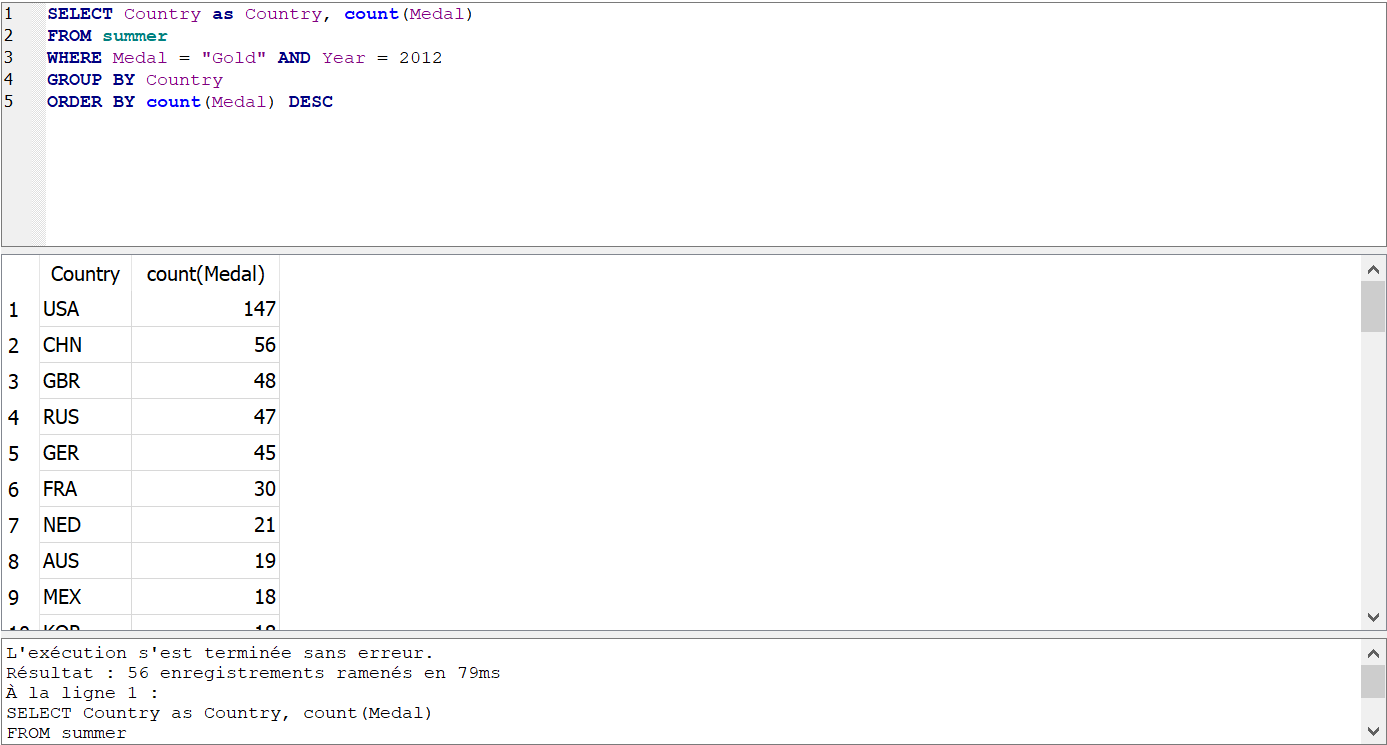

### Q16. Combien de femmes ont remporté des médailles ? (Alicia)

In [ ]:
SELECT Gender AS Gender, count(DISTINCT Athlete)
FROM summer
WHERE Gender = "Women"

In [ ]:
Women	5838

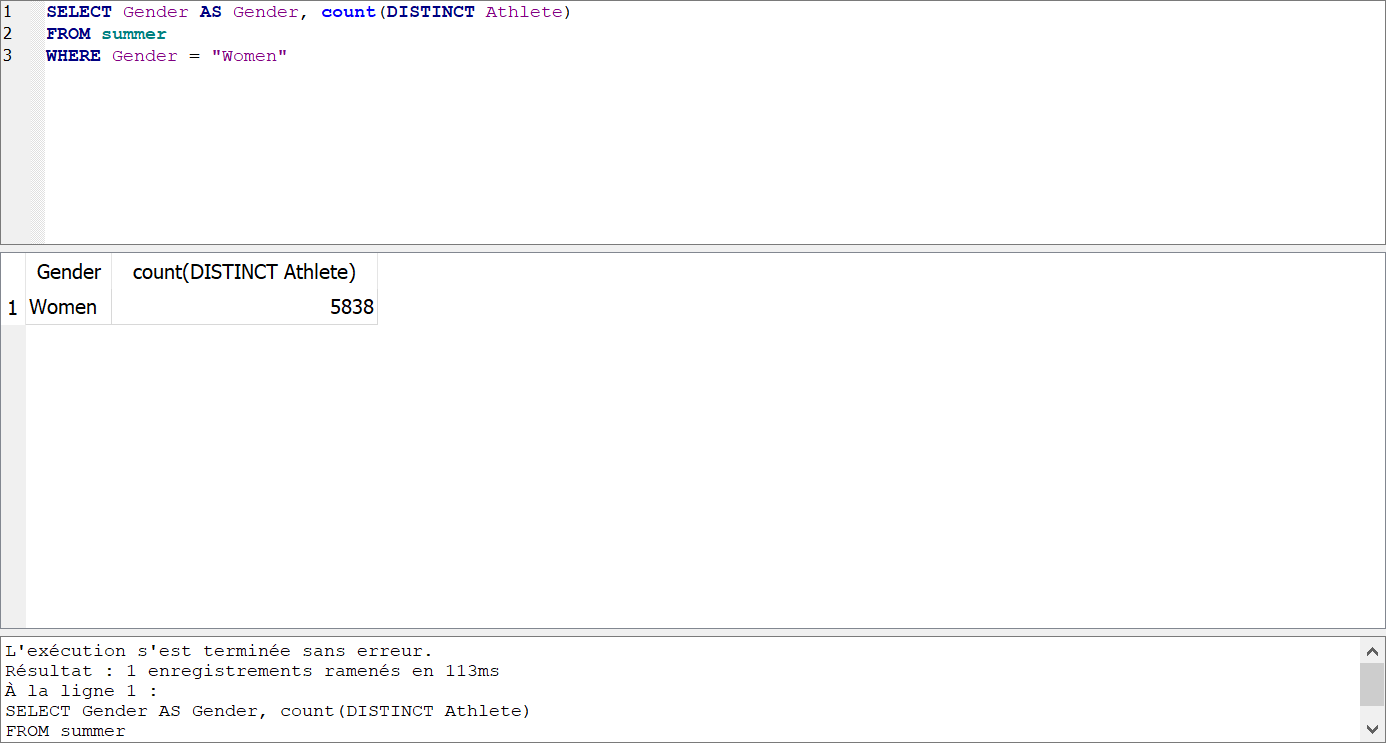

### Q17. Entre 1984 et 2012 combien de médailles a gagné la France ? (Abire)

In [ ]:
SELECT count(Medal)
FROM summer
WHERE Year BETWEEN 1984 AND 2012 AND Country = "FRA"

**482**

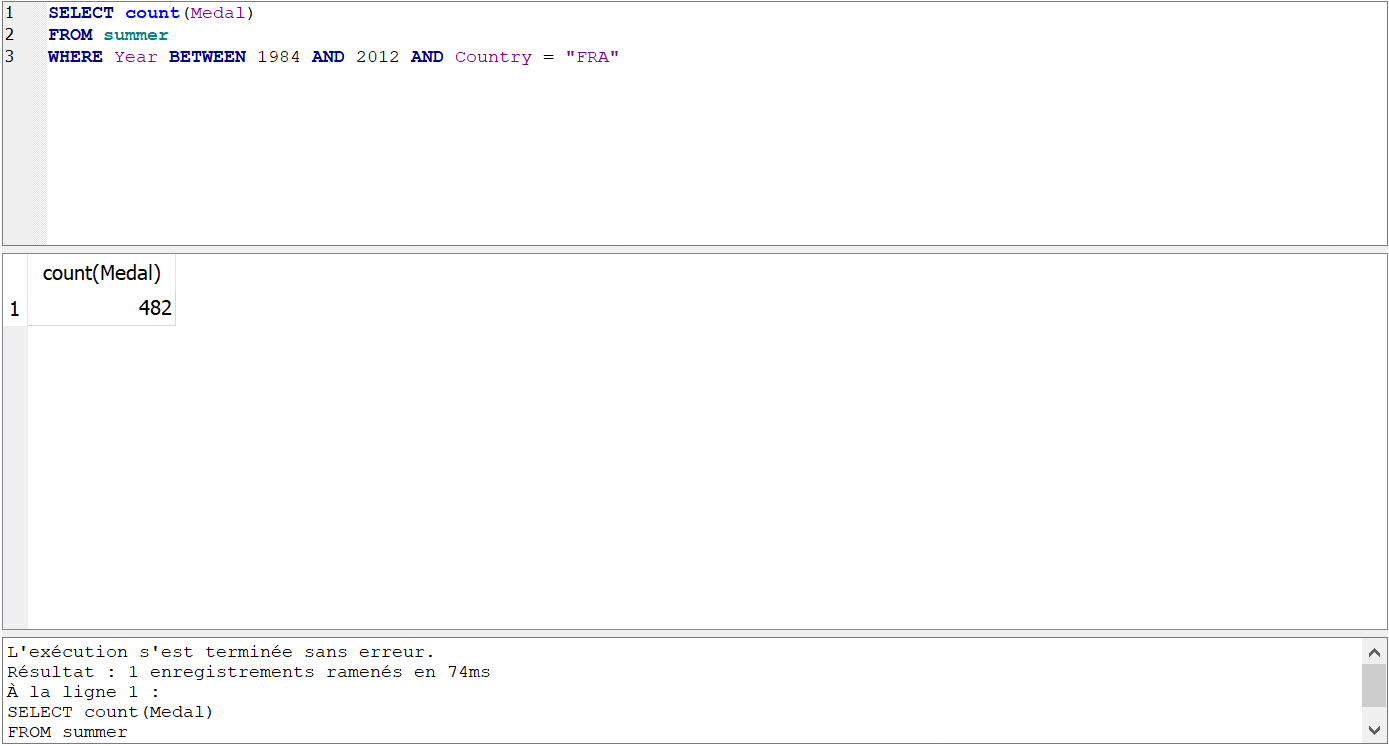

### Question i: 

--- 

Fin